# Assignment 1

## Compare Tests for Goodness of Fit on CitiBike Data

### Define Idea:

CitiBike age distributions

### Null Hypothesis:

H0: A Gaussian model and Exponential distribution do not fit the age distribution of CitiBike riders.

Ha: A Gaussian model and Exponential distribution fit the age distribution of CitiBike riders.

### Set working environment and import data

In [1]:
import pylab as pl
import numpy as np
%pylab inline

import os
import json

from zipfile import ZipFile
from StringIO import StringIO
import urllib2
import pandas as pd

#opening file into this notebook
r = urllib2.urlopen('https://s3.amazonaws.com/tripdata/201606-citibike-tripdata.zip').read()
z = ZipFile(StringIO(r))
citibikedata = z.open('201606-citibike-tripdata.csv')
data = pd.read_csv(citibikedata)
data.head()

Populating the interactive namespace from numpy and matplotlib


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [2]:
# create new column for age of riders
data['age'] = 2016 - data['birth year'][(data['usertype'] == 'Subscriber')]
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,44.0
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,49.0
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,27.0
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,25.0
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,27.0


In [3]:
# clean up data: eliminate irrelevant columns
age_data = data.loc[:,["age"]]
age_data.head()

,age
0,44.0
1,49.0
2,27.0
3,25.0
4,27.0


In [4]:
# subset riders to only 75 and younger (feasibility)
age_data = age_data[age_data["age"] <= 75]
len(age_data)

1263202

In [5]:
#drop any NaN
age_data.dropna(subset=['age'], how='all')
len(age_data)

1263202

### Gaussian Distribution

In [6]:
# perform KS test
import scipy.stats

#set mean and sd
mean = age_data.mean()
sd = age_data.std()
print mean
print sd

ksg = scipy.stats.kstest(age_data.age, 'norm', args = (mean, sd))
print ksg

age    38.260913
dtype: float64
age    11.379608
dtype: float64
KstestResult(statistic=0.10904900194102601, pvalue=0.0)


In [7]:
# perform Anderson test

adg = scipy.stats.anderson(age_data.age, dist='norm')
print adg

AndersonResult(statistic=20240.974511574022, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


### Exponential Distribution

In [13]:
# KS test
ks = scipy.stats.kstest(age_data.age, 'expon', args = (mean, sd))
print ks

KstestResult(statistic=0.58015503458670903, pvalue=0.0)


In [12]:
# Anderson test; need to use gumbel distribution (most similar to normal)
ad = scipy.stats.anderson(age_data.age, dist = 'expon')
print ad

AndersonResult(statistic=294657.27892330778, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


### Plotting the Distributions

In [17]:
from collections import Counter
Counter(age_data.age)

age_data_dist = pd.DataFrame(Counter(age_data.age),index = ('age','number')).T
ratio = age_data_dist / len(age_data)



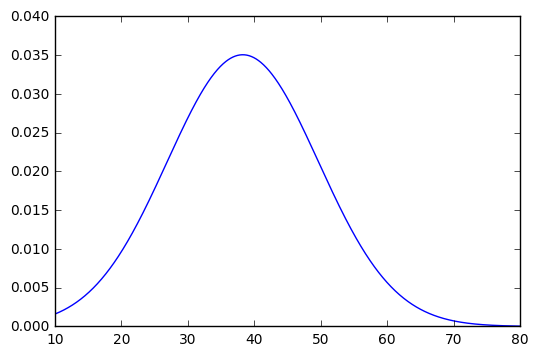

In [20]:
# generate random normal distribution
from scipy.stats import norm

x = np.linspace(10,80,1000)
y = norm.pdf(x, loc=mean, scale=sd)
pl.plot(x,y)

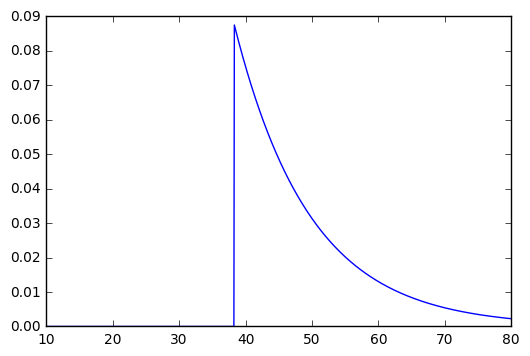

In [21]:
# generate random exponential distribution
from scipy.stats import expon

x2 = np.linspace(10,80,1000)
y2 = expon.pdf(x2, loc = mean, scale = sd)
pl.plot(x2,y2)


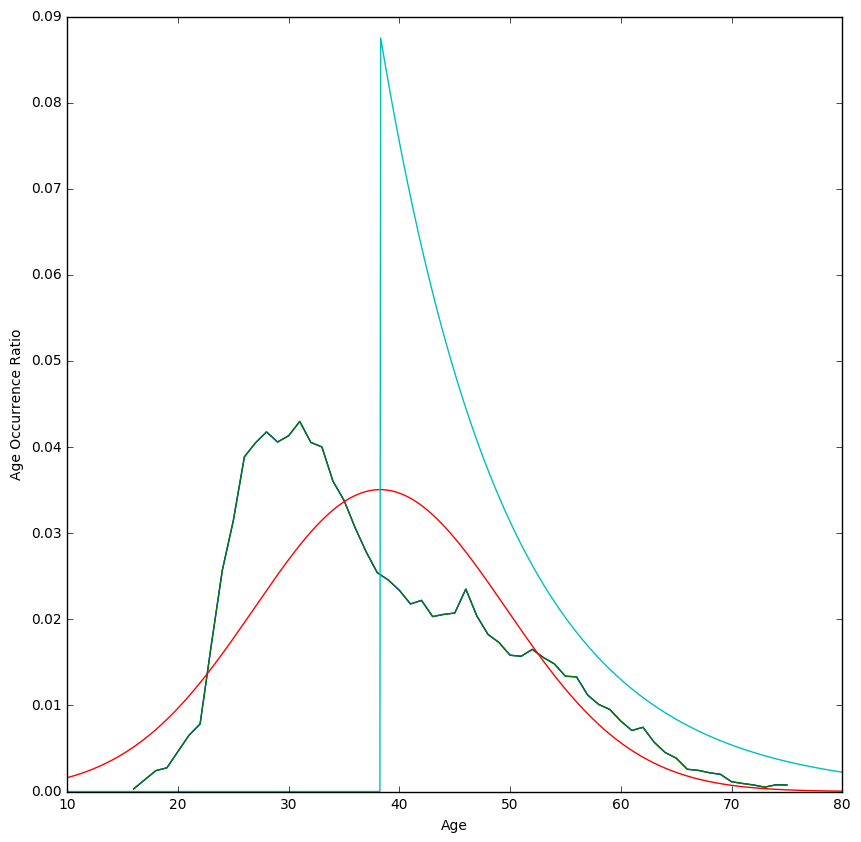

In [22]:
pl.figure(figsize = (10, 10))
pl.plot(ratio) #the citibike data
pl.plot(x,y) #normal distribution
pl.plot(x2,y2) #exponential distribution
pl.xlabel("Age")
pl.ylabel("Age Occurrence Ratio")
